## Setting up visualization portion of project

In [2]:
# visualization tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [31]:
# data tools
import datetime as dt
import numpy as np

from random import sample
from scipy import stats

In [4]:
# access to .csv job files
from os import listdir

In [5]:
# collect file names for all jobs
train_files = [ './train/'+file for file in listdir('./train/') if file.startswith('comet') ]
test_files = [ './test/'+file for file in listdir('./test/') if file.startswith('comet')]

desc_stat_files = [ './descriptive_stats/' + file for file in listdir('./descriptive_stats/') ]

all_jobs = [ *train_files, *test_files]

In [6]:
len(desc_stat_files)

8358

### Parse for trends
**Notes:**
    * Certain categories have been pre-selected to further analysis:
        * intel_hsw: Intel Haswell Processor (HSW) (per core)
        * intel_rapl: Running average power limit
        * ib: Infiniband usage
        * ib_sw: InfiniBand usage
        * ib_ext: Infiniband usage
        * llite: Lustre filesystem usage (per mount),
        * lnet: Lustre network usage
        * mdc: Lustre network usage
        * osc: Lustre filesystem usage
        * block: block device statistics (per device)
        * cpu: scheduler accounting (per CPU)
        * mem: memory usage (per socket)
        * net: network device usage (per device)
        * nfs: NFS system usage
        * proc: Process specific data (MaxRSS, executable name etc.)
        * sysv_shm SysV shared memory segment usage
        * tmpfs: ram-backed filesystem usage (per mount)
        * vm: virtual memory statistics
    * Extreme case will also be evaluated

In [44]:
# extreme values
most_cycles = ( '{host}_{jobid}', pd.DataFrame() )
most_stats = ( '{host}_{jobid}', pd.DataFrame() )

# specific values
intel_hsw_dfs = []
intel_rapl_dfs = []
ib_dfs = []
ib_sw_dfs = []
ib_ext_dfs = []
llite_dfs = []
lnet_dfs = []
mdc_dfs = []
osc_dfs = []
block_dfs = []
cpu_dfs = []
mem_dfs = []
net_dfs = []
nfs_dfs = []
proc_dfs = []
ps_dfs = []
sysv_shm_dfs = []
tmpfs_dfs = []
vm_dfs = []

In [51]:
cols = [
    ( intel_hsw_dfs,"Intel Haswell Processor (HSW) (per core)" ),
    ( intel_rapl_dfs,"Running average power limit" ),
    ( ib_dfs, "Infiniband usage (default)" ),
    ( ib_sw_dfs, "InfiniBand usage (sw)" ),
    ( ib_ext_dfs, "Infiniband usage (ext)" ),
    ( llite_dfs, "Lustre filesystem usage (per mount)" ),
    ( lnet_dfs, "Lustre network usage (lnet)" ),
    ( mdc_dfs, "Lustre network usage (mdc)" ),
    ( osc_dfs, "Lustre filesystem usage (osc)" ),
    ( block_dfs, "Block device statistics (per device)" ),
    ( cpu_dfs, "Scheduler accounting (per CPU)" ),
    ( mem_dfs, "Memory usage (per socket)" ),
    ( net_dfs, "Network device usage (per device)" ),
    ( nfs_dfs, "NFS system usage" ),
    ( proc_dfs, "Process specific data (MaxRSS, executable name etc.)" ),
    ( ps_dfs, "Process statistics" ),
    ( sysv_shm_dfs, "SysV shared memory segment usage" ),
    ( tmpfs_dfs, "Ram-backed filesystem usage (per mount)" ),
    ( vm_dfs, "Virtual memory statistics" )
] 

In [47]:
for i in range( len(all_jobs) ):
    file = all_jobs[i]
    df = pd.read_csv( file)
    
    # find job with most cycles of collected stats
    if (df.shape[0] > most_cycles[1].shape[0]): most_cycles = (file,df)
    # find job with most types of stats
    if (df.shape[1] > most_stats[1].shape[1]): most_stats = (file,df)
        
    # collect jobs with specific values    
    if "Intel Haswell Processor (HSW) (per core)" in df: intel_hsw_dfs.append((file,df)) 
    if "Running average power limit" in df: intel_rapl_dfs.append((file,df))
    if "Infiniband usage (default)" in df: ib_dfs.append((file,df))
    if "InfiniBand usage (sw)" in df: ib_sw_dfs.append((file,df))
    if "Infiniband usage (ext)" in df: ib_ext_dfs.append((file,df))
    if "Lustre filesystem usage (per mount)" in df: llite_dfs.append((file,df))
    if "Lustre network usage (lnet)" in df: lnet_dfs.append((file,df))
    if "Lustre network usage (mdc)" in df: mdc_dfs.append((file,df))
    if "Lustre filesystem usage (osc)" in df: osc_dfs.append((file,df))
    if "Block device statistics (per device)" in df: block_dfs.append((file,df))
    if "Scheduler accounting (per CPU)" in df: cpu_dfs.append((file,df))
    if "Memory usage (per socket)" in df: mem_dfs.append((file,df))
    if "Network device usage (per device)" in df: net_dfs.append((file,df))
    if "NFS system usage" in df: nfs_dfs.append((file,df))
    if "Process specific data (MaxRSS, executable name etc.)" in df: proc_dfs.append((file,df))
    if "Process statistics" in df: ps_dfs.append((file,df))
    if "SysV shared memory segment usage" in df: sysv_shm_dfs.append((file,df))
    if "Ram-backed filesystem usage (per mount)" in df: tmpfs_dfs.append((file,df))
    if "Virtual memory statistics" in df: vm_dfs.append((file,df))

In [9]:
most_cycles[1]

,Cycle,Block device statistics (per device),Scheduler accounting (per CPU),Infiniband usage (default),Infiniband usage (ext),InfiniBand usage (sw),Intel Haswell Processor (HSW) (per core),Caching Agent (CBo) for SNB (HSW) (per socket),Home Agent Unit for SNB (HSW) (per socket),Integrated Memory Controller for SNB (HSW) (per socket),...,Memory usage (per socket),Network device usage (per device),NFS system usage,NUMA statistics (per socket),"Process specific data (MaxRSS, executable name etc.)",Process statistics,SysV shared memory segment usage,Ram-backed filesystem usage (per mount),Dentry/file/inode cache usage,Virtual memory statistics
0,00:05:10,2.233600e+07,663965.571,0.0,39748465.7,9.894929e+07,1.408133e+12,3.916951e+10,3.502309e+13,7.442814e+08,...,8.628043e+09,1.620759e+06,0.00,780286.000,1168080.933,1.462143e+08,0.0,65961986.5,13724.000,2.301076e+07
1,00:06:59,5.396789e+07,1891177.143,0.0,112431613.0,2.798981e+08,2.834801e+14,2.815308e+14,3.313158e+14,2.251811e+14,...,8.630453e+09,4.540888e+06,67.33,2047090.667,1168080.933,4.163055e+08,0.0,65961986.5,21224.000,5.595069e+07
2,00:07:09,1.222653e+08,4342705.143,0.0,259886977.0,6.469736e+08,8.464272e+14,8.444806e+14,8.942723e+14,6.755411e+14,...,8.633021e+09,1.060311e+07,67.33,4586023.000,1168080.933,9.560565e+08,0.0,65961986.5,21342.667,1.059396e+08
3,00:15:10,2.377984e+07,672477.571,0.0,40271436.9,1.002511e+08,1.426114e+12,3.967467e+10,3.547210e+13,7.612391e+08,...,8.628104e+09,1.644257e+06,0.00,791419.000,1168080.933,1.481060e+08,0.0,65961986.5,13660.000,2.421918e+07
4,00:16:59,5.406325e+07,1899689.714,0.0,112943936.4,2.811735e+08,2.834981e+14,2.815313e+14,3.317648e+14,2.251811e+14,...,8.630465e+09,4.562483e+06,67.33,2056122.667,1168080.933,4.181786e+08,0.0,65961986.5,21240.000,5.606208e+07
5,00:17:09,1.237007e+08,4351217.000,0.0,260441777.4,6.483543e+08,8.464451e+14,8.444811e+14,8.947213e+14,6.755411e+14,...,8.633288e+09,1.062237e+07,67.33,4605888.000,1168080.933,9.579606e+08,0.0,65961986.5,21327.000,1.071565e+08
6,00:17:10,9.056390e+07,3125519.571,0.0,185392298.0,4.615426e+08,5.649706e+14,5.630062e+14,6.132474e+14,4.503610e+14,...,8.632166e+09,7.531734e+06,67.33,3289748.667,1168080.933,6.879314e+08,0.0,65961986.5,21257.333,7.350740e+07
7,00:25:10,2.544492e+07,680988.714,0.0,40788395.3,1.015380e+08,1.444158e+12,4.017756e+10,3.592111e+13,7.778941e+08,...,8.628131e+09,1.668386e+06,0.00,813881.667,1168080.933,1.499808e+08,0.0,65961986.5,13741.667,2.557059e+07
8,00:26:59,5.419846e+07,1908201.429,0.0,113447990.4,2.824284e+08,2.835162e+14,2.815318e+14,3.322138e+14,2.251811e+14,...,8.630476e+09,4.582573e+06,67.33,2068784.667,1168080.933,4.200526e+08,0.0,65961986.5,21256.333,5.623072e+07
9,00:27:09,1.252719e+08,4359730.571,0.0,260951106.0,6.496223e+08,8.464632e+14,8.444816e+14,8.951704e+14,6.755411e+14,...,8.633286e+09,1.064121e+07,67.33,4626848.667,1168080.933,9.598348e+08,0.0,65961986.5,21359.333,1.084318e+08


In [10]:
most_stats[1]

,Cycle,Block device statistics (per device),Scheduler accounting (per CPU),Infiniband usage (default),Infiniband usage (ext),InfiniBand usage (sw),Intel Haswell Processor (HSW) (per core),Caching Agent (CBo) for SNB (HSW) (per socket),Home Agent Unit for SNB (HSW) (per socket),Integrated Memory Controller for SNB (HSW) (per socket),...,Network device usage (per device),NFS system usage,NUMA statistics (per socket),Lustre filesystem usage (osc),"Process specific data (MaxRSS, executable name etc.)",Process statistics,SysV shared memory segment usage,Ram-backed filesystem usage (per mount),Dentry/file/inode cache usage,Virtual memory statistics
0,00:41:33,0.000000e+00,0.000,0.0,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000,0.0,0.000000e+00,0.0,34239.4,6.162860e+02,0.0,0.5,20175.000,0.000000e+00
1,00:51:33,9.019902e+06,8564.714,0.0,5.464135e+10,1.364903e+11,1.165101e+09,7.603681e+10,4.754782e+11,1.392123e+11,...,57998.217,0.0,2.744191e+06,793.4,34239.4,4.637056e+06,0.0,7.0,22340.000,1.264204e+07
2,01:01:33,9.912241e+06,17131.000,0.0,1.136762e+11,2.839549e+11,2.108158e+09,1.498462e+11,9.506452e+11,2.780652e+11,...,103579.261,0.0,5.614329e+06,1505.6,50893.8,7.793329e+06,0.0,7.0,22337.333,1.759385e+07
3,01:11:33,1.125866e+07,25697.000,0.0,1.721833e+11,4.301020e+11,3.136965e+09,2.216591e+11,1.425112e+12,4.165651e+11,...,142463.478,0.0,8.543252e+06,2142.0,51837.8,1.095381e+07,0.0,7.0,22335.667,2.309537e+07
4,01:21:33,1.141736e+07,34263.571,0.0,2.305498e+11,5.758980e+11,3.970212e+09,2.935114e+11,1.899554e+12,5.550521e+11,...,184940.217,0.0,1.148022e+07,3306.3,51994.6,1.410352e+07,0.0,7.0,22353.667,2.756497e+07


# matplotlib Visualizations

In [38]:
def samplePlot ( df, n, col ):
    mode = stats.mode( [tup[1].shape[0] for tup in df if tup[1].shape[0] > 5] )[0][0]
    s = sample( [ tup[1] for tup in df if tup[1].shape[0] == mode ] , n )
    
    for job in s:
        plt.plot( job[col] )
    
    plt.grid( True )
    plt.gcf().set_size_inches(15, 11)

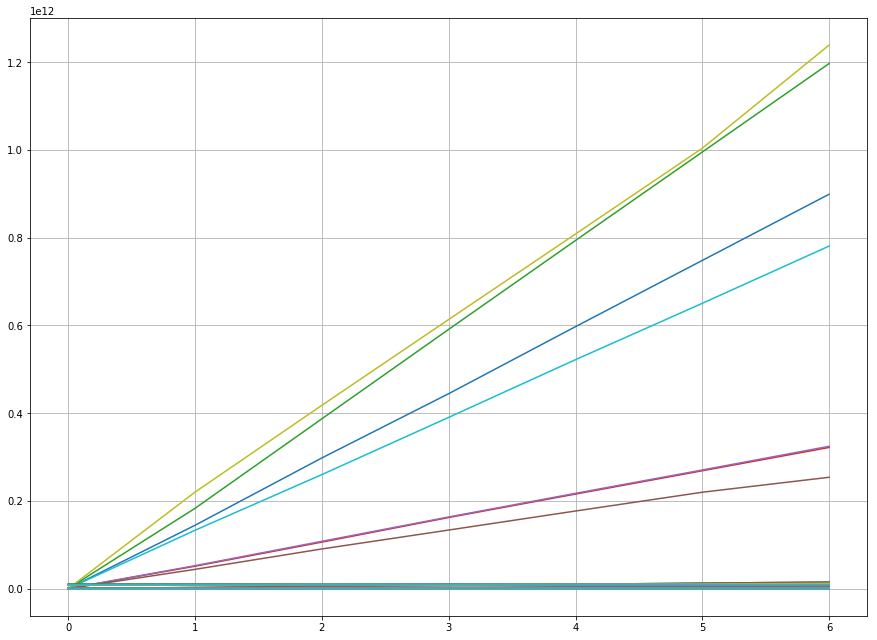

In [53]:
for i in range( len(cols) ):
    samplePlot( cols[i][0], 10, cols[i][1] )

In [ ]:
#     # 
#     ax1_df = pd.DataFrame({'times': times_df.columns, 'accidents': [177,116,189,186,268,195]})
#     ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
#     ax1.plot( 'times', 'accidents', data=ax1_df,
#              marker='o', markersize=10.0, linewidth=5.0, color="black", alpha=0.6)
#     plt.grid( True )
#     
#     # Label graphs
#     #      Top graph
#     xticklabels( labels=times_df.columns, fontsize='large' )
#     title( label="Number of Fatal Accidents by Time", pad=20,
#           fontdict={'fontweight': 'bold', 'fontsize': 25} )
#     xlabel( "Time of Day", labelpad=15, fontweight='bold', fontsize='x-large' )
#     ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='x-large' )
#     
#     # Fill graph backgrounds
#     ax1.set_facecolor( '0.99' )
#     
#     # Setup spacing of graphs
#     plt.gcf().set_size_inches(15, 11)
#     plt.subplots_adjust( wspace=0.35, hspace = 0.5 )
#     
#     # Save figure as .png
#     plt.savefig( "./Visuals/time_vs_severity.png", bbox='tight')

In [ ]:
    # Setup top graph
#     ax1_df = pd.DataFrame({'times': times_df.columns, 'accidents': [177,116,189,186,268,195]})
#     ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
#     ax1.plot( 'times', 'accidents', data=ax1_df,
#              marker='o', markersize=10.0, linewidth=5.0, color="black", alpha=0.6)
#     plt.grid( True )
#     
#     # Setup left graph
#     ax2_df = pd.DataFrame({'times': times_df.columns, 'accidents': [1315,1603,3507,4040,5009,2891]})
#     ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
#     ax2.plot( 'times', 'accidents', data=ax2_df,
#              marker='o', markersize=10.0, linewidth=5.0, color="yellow", alpha=0.9)
#     plt.grid( True )
#     
#     # Setup right graph
#     ax3_df = pd.DataFrame({'times': times_df.columns, 'accidents': [5372,8912,27562,31082,36311,16487]})
#     ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
#     ax3.plot( 'times', 'accidents', data=ax3_df, label="Number of Slight Accidents by Time",
#              marker='o', markersize=10.0, linewidth=5.0, color="lightblue", alpha=0.9)
#     plt.grid( True )
#     
#     # Label graphs
#     #      Top graph
#     ax1.set_xticklabels( labels=times_df.columns, fontsize='large' )
#     ax1.set_title( label="Number of Fatal Accidents by Time", pad=20,
#                   fontdict={'fontweight': 'bold', 'fontsize': 25} )
#     ax1.set_xlabel( "Time of Day", labelpad=15, fontweight='bold', fontsize='x-large' )
#     ax1.set_ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='x-large' )
#     
#     #      Left graph
#     ax2.set_title( label="Number of Serious Accidents by Time", pad=12,
#                   fontdict={'fontweight': 'bold', 'fontsize': 15} )
#     ax2.set_xlabel( "Time of Day", labelpad=15, fontweight='bold', fontsize='large' )
#     ax2.set_ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='large' )
#     
#     #      Right graph
#     ax3.set_title( label="Number of Minor Accidents by Time", pad=12,
#                   fontdict={'fontweight': 'bold', 'fontsize': 15} )
#     ax3.set_xlabel( "Time of Day", labelpad=15, fontweight='bold', fontsize='large' )
#     ax3.set_ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='large' )
#     
#     # Fill graph backgrounds
#     ax1.set_facecolor( '0.99' )
#     ax2.set_facecolor( '0.99' )
#     ax3.set_facecolor( '0.99' )
#     
#     # Setup spacing of graphs
#     plt.gcf().set_size_inches(15, 11)
#     plt.subplots_adjust( wspace=0.35, hspace = 0.5 )
#     
#     # Save figure as .png
#     plt.savefig( "./Visuals/time_vs_severity.png", bbox='tight')

# seaborn Visualizations

In [ ]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [ ]:
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m
df

# Bokeh Visualizations

In [ ]:
output_file('bokeh_example.html')

sample = most_cycles[1] #.sample(50)
source = ColumnDataSource(sample)
p = figure()
#p.circle(x='TOTAL_TONS', y='AC_ATTACKING',
#         source=source,
#         size=10, color='green')
#p.title.text = 'Attacking Aircraft and Munitions Dropped'
#p.xaxis.axis_label = 'Tons of Munitions Dropped'
#p.yaxis.axis_label = 'Number of Attacking Aircraft'
#hover = HoverTool()
#hover.tooltips=[
#    ('Attack Date', '@MSNDATE'),
#    ('Attacking Aircraft', '@AC_ATTACKING'),
#    ('Tons of Munitions', '@TOTAL_TONS'),
#    ('Type of Aircraft', '@AIRCRAFT_NAME')
#]
#
#p.add_tools(hover)
#
#show(p)